In [1]:
#import all required libraries
#Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot

#model developemnt libraries
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function for creating model pipelines
from sklearn.pipeline import  make_pipeline

# Pickle for saving model files
import pickle

# For standardization
from sklearn.preprocessing  import StandardScaler

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

# Classification metrics (added later)
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import time
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [15]:

data = pd.read_csv("train.csv")
data = data.drop(['Id','BUTTER'],axis=1)
y = data['signal']
X = data.drop(['signal'],axis=1)
X_train, X_test, y_train, y_test  = train_test_split(X, y,
                                                     test_size = 0.25,
                                                     random_state = 1234, 
                                                     stratify = data['signal'])
# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

159496 53166
159496 53166


In [16]:
data.head()

,B_OWNPV_CHI2,B_IPCHI2_OWNPV,B_FDCHI2_OWNPV,B_DIRA_OWNPV,B_PT,Kst_892_0_IP_OWNPV,Kst_892_0_cosThetaH,Kplus_IP_OWNPV,Kplus_P,piminus_IP_OWNPV,piminus_P,gamma_PT,piminus_ETA,Kplus_ETA,signal
0,28.878847,2.662533,2924.690991,0.999997,19085.568945,0.569198,-0.575502,0.581565,66850.893711,0.637969,14298.486178,7940.694301,2.628526,2.680116,1.0
1,34.233566,0.092746,346.948714,0.999997,6631.244546,0.248707,-0.615941,0.277898,39274.475071,0.148815,11553.163934,3904.681337,3.292504,3.085754,1.0
2,36.113632,2.442423,238.553023,0.999986,7740.918989,0.222347,0.249383,0.216576,27757.153899,0.249840,24081.196003,4738.891687,3.433676,3.121906,1.0
3,14.286133,6.337556,227.375132,0.999806,6740.281614,0.347316,0.591884,0.306927,10593.207077,0.400748,11343.521945,3308.943750,2.291867,2.200712,0.0
4,60.474274,7.632751,106.730650,0.999905,5556.388794,0.204273,0.655850,0.196600,11801.249543,0.223101,25940.693317,4026.326871,3.290073,3.281829,0.0


In [17]:
# Pipeline dictionary
pipelines = {
#     'l1': make_pipeline(StandardScaler(),
#                         LogisticRegression(penalty='l2',random_state=123)),
    'mlp': make_pipeline(StandardScaler(),
                        MLPClassifier(random_state=123))
}

In [22]:
pep = Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=True, epsilon=1e-08,
                               hidden_layer_sizes=(100, 50, 50, 50, 100),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=500, momentum=0.9, n_iter_no_change=5,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=1997, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=True, warm_start=False))],
         verbose=True)

In [23]:
pipelines['mlp'].get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('mlpclassifier', MLPClassifier(random_state=123))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'mlpclassifier': MLPClassifier(random_state=123),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'mlpclassifier__activation': 'relu',
 'mlpclassifier__alpha': 0.0001,
 'mlpclassifier__batch_size': 'auto',
 'mlpclassifier__beta_1': 0.9,
 'mlpclassifier__beta_2': 0.999,
 'mlpclassifier__early_stopping': False,
 'mlpclassifier__epsilon': 1e-08,
 'mlpclassifier__hidden_layer_sizes': (100,),
 'mlpclassifier__learning_rate': 'constant',
 'mlpclassifier__learning_rate_init': 0.001,
 'mlpclassifier__max_fun': 15000,
 'mlpclassifier__max_iter': 200,
 'mlpclassifier__momentum': 0.9,
 'mlpclassifier__n_iter_no_change': 10,
 'mlpclassifier__nesterovs_momentum': True,
 'mlpclassifier__power_t': 0.5,
 'mlpclassifier__random_state': 123,
 'mlpclassifier__shuffle': True,


In [40]:
mlp_hyperparameters = {
    'mlpclassifier__hidden_layer_sizes': [(100,100,100,100,100,50,10)],
    'mlpclassifier__activation': ['tanh']
    'mlpclassifier__solver': ['sgd'],
    'mlpclassifier__learning_rate': ['constant']
}

# Create hyperparameters dictionary
hyperparameters = {
                  'mlp': mlp_hyperparameters}

SyntaxError: invalid syntax (<ipython-input-40-a492ef59aa3f>, line 4)

In [41]:
# Create empty dictionary called fitted_models
fitted_models = {}
start_time = time.time()

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv = 2, n_jobs=-1,verbose=11)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print('{0} has been fitted'.format(name))
print("--- %s seconds ---" % (time.time() - start_time))

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done   4 out of  24 | elapsed: 25.4min remaining: 126.9min
[Parallel(n_jobs=-1)]: Done   7 out of  24 | elapsed: 28.8min remaining: 69.9min
[Parallel(n_jobs=-1)]: Done  10 out of  24 | elapsed: 31.1min remaining: 43.6min
[Parallel(n_jobs=-1)]: Done  13 out of  24 | elapsed: 50.7min remaining: 42.9min
[Parallel(n_jobs=-1)]: Done  16 out of  24 | elapsed: 50.9min remaining: 25.5min
[Parallel(n_jobs=-1)]: Done  19 out of  24 | elapsed: 53.1min remaining: 14.0min
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed: 65.6min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 67.9min finished


mlp has been fitted
--- 4798.80078625679 seconds ---


C:\Users\blair\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [42]:
# Display best_score_ for each fitted model
for name,model in fitted_models.items():
    print(name, "Score: ", model.best_score_)

mlp Score:  0.8147477052716056


In [39]:
fitted_models['mlp'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh',
                               hidden_layer_sizes=(100, 100, 100, 100, 100),
                               random_state=123, solver='sgd'))])

In [27]:
for name,model in fitted_models.items():
    with open('model_'+name+'MLP.pkl', 'wb') as f:
        pickle.dump(model.best_estimator_, f)

In [28]:
#Predict PROBABILITIES
pred = fitted_models['mlp'].predict_proba(X_test)

# Get just the prediction for the positive class (1)
pred = [p[1] for p in pred]

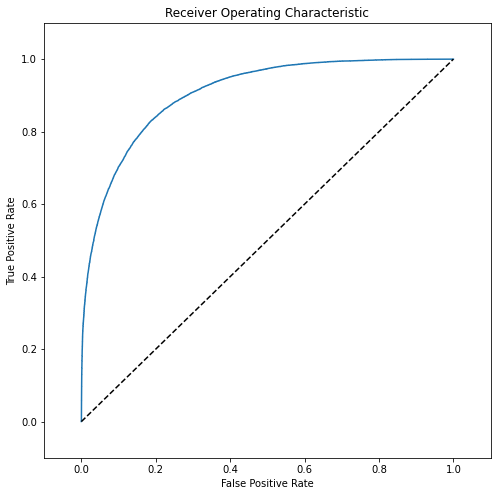

In [29]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, pred)
# Initialize figure
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')

# Diagonal 45 degree line
plt.plot([0,1],[0,1], 'k--')

# Axes limits and labels
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
# Code here

for name, model in fitted_models.items():
    pred = model.predict_proba(X_test)
    pred = [p[1] for p in pred]
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    print(name, auc(fpr, tpr))

mlp 0.9058270380687241


In [21]:
a=list(zip(fitted_models['MLP'].best_estimator_.named_steps['mlpclassifier'].feature_importances_,X_train))
a.sort()
for i in a:
    print(i)

AttributeError: 'MLPClassifier' object has no attribute 'feature_importances_'

In [43]:
test = pd.read_csv('test.csv')
test =test.drop(['Id','BUTTER'],axis=1)

In [21]:
test.shape

(141776, 14)

In [ ]:
model.fit(X,y)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


In [ ]:
a = model.predict_proba(test)
print(a.shape)
df = pd.DataFrame({'Predicted':a[:,1]})

In [ ]:
df.to_csv("MLP6.csv",index=True)